# Health Insurance Claims System

In [1]:
# libraries
import psycopg2
import os
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Supprimer les avertissements de dépréciation
warnings.simplefilter(action='ignore', category=DeprecationWarning)


In [3]:
# Charger les informations sensibles depuis le fichier JSON
with open('C:/Users\serge/OneDrive/Bureau/Portfolio_proj/Health Insurance/Scripts/config_file.json', 'r') as file:
    config = json.load(file)

# Extraire les informations de connexion
dbname = config.get('dbname')
user = config.get('user')
password = config.get('password')
host = config.get('host')

In [4]:
# Se connecter à la base de données PostgreSQL
conn = psycopg2.connect(
    dbname=dbname,
    user=user,
    password=password,
    host=host
)
cur = conn.cursor()

In [5]:
# Créer un curseur pour exécuter des requêtes
cur = conn.cursor()

In [6]:
# Requête 1 : Top membres avec des détails associés
query1 = """
select member.member_first_name, member.member_last_name, 
	status.claim_status, 
	provider.provider_first_name, provider.provider_last_name, provider.network, provider.practice_name, 
	claims_payment.billed_amount, claims_payment.approuved_amount, claims_payment.net_payment
	from 
		((((insurance.member inner join insurance.claims on member.claim_id = claims.claim_id) 
				inner join insurance.status on status.status_id = claims.status_id)
                inner join insurance.provider on provider.claim_id = member.claim_id)
				inner join insurance.claims_payment on claims_payment.claim_id = claims.claim_id)
	where claims_payment.approuved_amount > 2200
	order by claims_payment.approuved_amount desc limit 100;
"""
df1 = pd.read_sql_query(query1, conn)



c:\Users\serge\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
# Requête 2 : Membres avec des réclamations payées
query2 = """
SELECT member.member_first_name, member.member_last_name, member.member_dob, member.gender, member.claim_id,
       status.claim_status, status.type
FROM ((insurance.member
INNER JOIN insurance.claims ON member.claim_id = claims.claim_id) 
INNER JOIN insurance.status ON status.status_id = claims.status_id)
WHERE status.claim_status = 'paid'
ORDER BY member.member_first_name;
"""
df2 = pd.read_sql_query(query2, conn)

c:\Users\serge\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [8]:
# Requête 3 : Récupérer les données
query3 = """
select member.member_first_name, member.member_last_name, status.claim_status, 
	   provider.provider_first_name, provider.provider_last_name, provider.network,
       provider.practice_name, claims_payment.billed_amount, claims_payment.approuved_amount, claims_payment.net_payment
	from 
		((((insurance.member inner join insurance.claims on member.claim_id = claims.claim_id) 
				inner join insurance.status on status.status_id = claims.status_id)
                inner join insurance.provider on provider.claim_id = member.claim_id)
				inner join insurance.claims_payment on claims_payment.claim_id = claims.claim_id)
	where claims_payment.approuved_amount > 2200
	order by claims_payment.approuved_amount desc limit 100;
"""

df3 = pd.read_sql_query(query3, conn)

c:\Users\serge\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [9]:
# Fermer le curseur et la connexion
cur.close()
conn.close()

In [38]:
# Sauvegarder les DataFrames au format CSV
#df1.to_csv('C:/Users/serge/OneDrive/Bureau/Portfolio_proj/Health Insurance/Datasets/top_approved_claims.csv', index=False)
#df2.to_csv('C:/Users/serge/OneDrive/Bureau/Portfolio_proj/Health Insurance/Datasets/paid_claims_member_info.csv', index=False)
#df3.to_csv('C:/Users/serge/OneDrive/Bureau/Portfolio_proj/Health Insurance/Datasets/top_approved_customers_view.csv', index=False)


In [12]:
# EDA
df1.head()

,member_first_name,member_last_name,claim_status,provider_first_name,provider_last_name,network,practice_name,billed_amount,approuved_amount,net_payment
0,Marcia,Farrell,history,Harper,Ochoa,In Network,WELLCARE HOSPITAL,4785,2991,3003
1,Plato,Stuart,history,Cade,Conrad,In Network,ADVENT HEATH,4726,2983,2989
2,Eve,Spence,paid,Asher,Rodgers,In Network,VIERRA HOSPITAL,4921,2982,2995
3,Piper,Weber,deny,Norman,Floyd,Out Network,MEMORIAL HOSPITAL,4812,2979,2982
4,Jordan,Hill,paid,Nissim,Ellis,Out Network,ABC HOSPITAL,4330,2977,2988


In [13]:
df2.head()

,member_first_name,member_last_name,member_dob,gender,claim_id,claim_status,type
0,Abigail,Mosley,1987-08-30,Female,951,paid,cl
1,Britanni,Sloan,1980-10-25,Male,961,paid,cl
2,Candice,Skinner,1981-06-28,Male,931,paid,cl
3,Dacey,Finch,1976-05-03,Female,946,paid,cl
4,Dana,Guerrero,1974-02-26,Male,901,paid,cl


In [14]:
df3.head()

,member_first_name,member_last_name,claim_status,provider_first_name,provider_last_name,network,practice_name,billed_amount,approuved_amount,net_payment
0,Marcia,Farrell,history,Harper,Ochoa,In Network,WELLCARE HOSPITAL,4785,2991,3003
1,Plato,Stuart,history,Cade,Conrad,In Network,ADVENT HEATH,4726,2983,2989
2,Eve,Spence,paid,Asher,Rodgers,In Network,VIERRA HOSPITAL,4921,2982,2995
3,Piper,Weber,deny,Norman,Floyd,Out Network,MEMORIAL HOSPITAL,4812,2979,2982
4,Jordan,Hill,paid,Nissim,Ellis,Out Network,ABC HOSPITAL,4330,2977,2988


In [15]:
# Afficher des informations générales sur les DataFrames
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   member_first_name    71 non-null     object
 1   member_last_name     71 non-null     object
 2   claim_status         71 non-null     object
 3   provider_first_name  71 non-null     object
 4   provider_last_name   71 non-null     object
 5   network              71 non-null     object
 6   practice_name        71 non-null     object
 7   billed_amount        71 non-null     int64 
 8   approuved_amount     71 non-null     int64 
 9   net_payment          71 non-null     int64 
dtypes: int64(3), object(7)
memory usage: 5.7+ KB


In [16]:
df1.describe()

,billed_amount,approuved_amount,net_payment
count,71.000000,71.000000,71.000000
mean,4451.380282,2622.647887,2632.704225
std,315.579303,263.142444,264.165283
min,4000.000000,2207.000000,2215.000000
25%,4160.000000,2337.000000,2348.000000
50%,4404.000000,2655.000000,2664.000000
75%,4767.000000,2853.000000,2869.000000
max,4991.000000,2991.000000,3003.000000


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   member_first_name  19 non-null     object
 1   member_last_name   19 non-null     object
 2   member_dob         19 non-null     object
 3   gender             19 non-null     object
 4   claim_id           19 non-null     int64 
 5   claim_status       19 non-null     object
 6   type               19 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.2+ KB


In [18]:
df2.describe()

,claim_id
count,19.000000
mean,946.000000
std,28.136572
min,901.000000
25%,923.500000
50%,946.000000
75%,968.500000
max,991.000000


In [19]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   member_first_name    71 non-null     object
 1   member_last_name     71 non-null     object
 2   claim_status         71 non-null     object
 3   provider_first_name  71 non-null     object
 4   provider_last_name   71 non-null     object
 5   network              71 non-null     object
 6   practice_name        71 non-null     object
 7   billed_amount        71 non-null     int64 
 8   approuved_amount     71 non-null     int64 
 9   net_payment          71 non-null     int64 
dtypes: int64(3), object(7)
memory usage: 5.7+ KB


In [20]:
df3.describe()

,billed_amount,approuved_amount,net_payment
count,71.000000,71.000000,71.000000
mean,4451.380282,2622.647887,2632.704225
std,315.579303,263.142444,264.165283
min,4000.000000,2207.000000,2215.000000
25%,4160.000000,2337.000000,2348.000000
50%,4404.000000,2655.000000,2664.000000
75%,4767.000000,2853.000000,2869.000000
max,4991.000000,2991.000000,3003.000000


In [21]:
# Supprimer les doublons si nécessaire
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()
df3 = df3.drop_duplicates()

# Convertir les colonnes en types appropriés si nécessaire
df1['billed_amount'] = pd.to_numeric(df1['billed_amount'], errors='coerce')
df1['approuved_amount'] = pd.to_numeric(df1['approuved_amount'], errors='coerce')
df1['net_payment'] = pd.to_numeric(df1['net_payment'], errors='coerce')

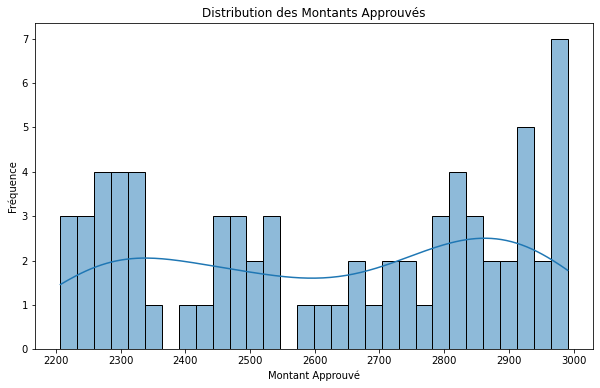

In [22]:
# Histogramme des montants approuvés
plt.figure(figsize=(10, 6))
sns.histplot(df1['approuved_amount'], bins=30, kde=True)
plt.title('Distribution des Montants Approuvés')
plt.xlabel('Montant Approuvé')
plt.ylabel('Fréquence')
plt.show()

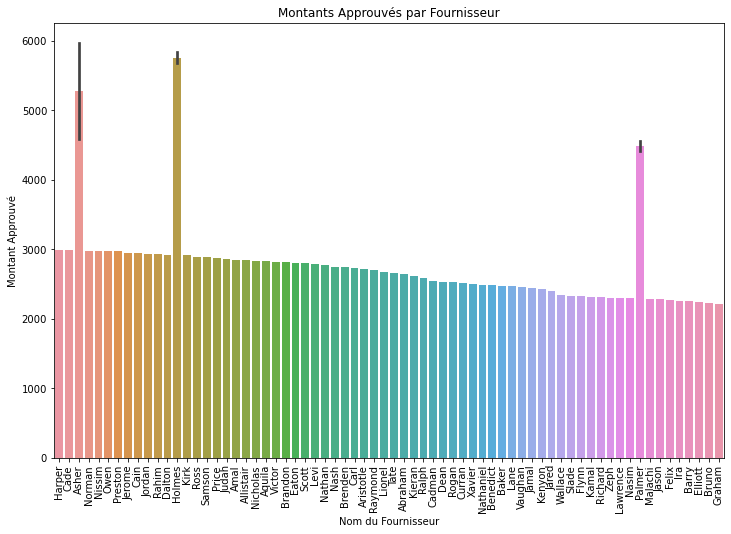

In [23]:
# Montants approuvés par fournisseur
plt.figure(figsize=(12, 8))
sns.barplot(data=df1, x='provider_first_name', y='approuved_amount', estimator=sum)
plt.title('Montants Approuvés par Fournisseur')
plt.xlabel('Nom du Fournisseur')
plt.ylabel('Montant Approuvé')
plt.xticks(rotation=90)
plt.show()

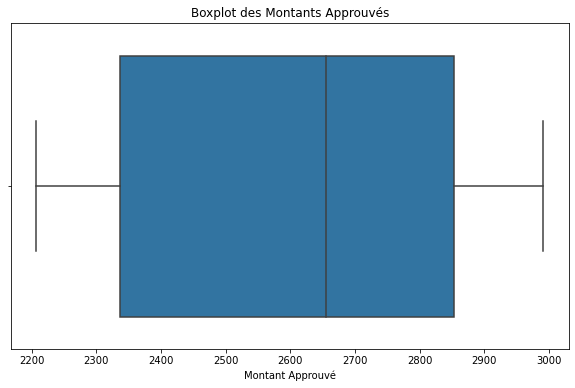

In [24]:
# Graphique en boîte pour les montants approuvés
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='approuved_amount')
plt.title('Boxplot des Montants Approuvés')
plt.xlabel('Montant Approuvé')
plt.show()

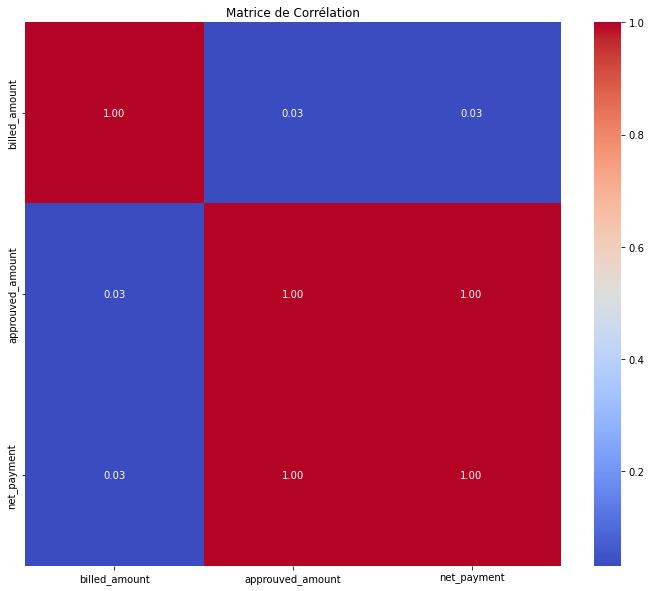

In [25]:
# Matrice de corrélation
plt.figure(figsize=(12, 10))
corr = df1[['billed_amount', 'approuved_amount', 'net_payment']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

In [26]:
# Tableau croisé dynamique des montants approuvés par statut de réclamation
pivot_table = df2.pivot_table(values='claim_id', index='claim_status', aggfunc='count')
pivot_table

,claim_id
claim_status,
paid,19


<Figure size 720x432 with 0 Axes>

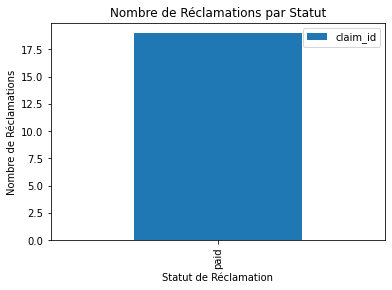

In [27]:
# Graphique à barres pour le tableau croisé
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar')
plt.title('Nombre de Réclamations par Statut')
plt.xlabel('Statut de Réclamation')
plt.ylabel('Nombre de Réclamations')
plt.show()

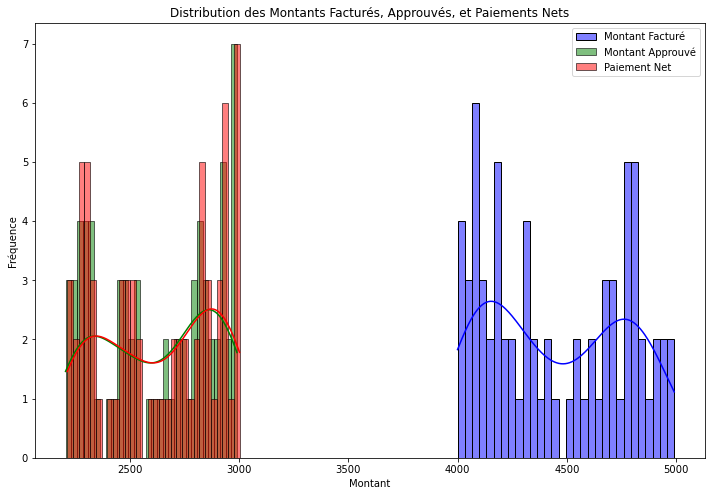

In [28]:
# Comparaison des distributions
plt.figure(figsize=(12, 8))
sns.histplot(df1['billed_amount'], bins=30, kde=True, color='blue', label='Montant Facturé')
sns.histplot(df1['approuved_amount'], bins=30, kde=True, color='green', label='Montant Approuvé')
sns.histplot(df1['net_payment'], bins=30, kde=True, color='red', label='Paiement Net')
plt.title('Distribution des Montants Facturés, Approuvés, et Paiements Nets')
plt.xlabel('Montant')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

In [29]:
df1.head()

,member_first_name,member_last_name,claim_status,provider_first_name,provider_last_name,network,practice_name,billed_amount,approuved_amount,net_payment
0,Marcia,Farrell,history,Harper,Ochoa,In Network,WELLCARE HOSPITAL,4785,2991,3003
1,Plato,Stuart,history,Cade,Conrad,In Network,ADVENT HEATH,4726,2983,2989
2,Eve,Spence,paid,Asher,Rodgers,In Network,VIERRA HOSPITAL,4921,2982,2995
3,Piper,Weber,deny,Norman,Floyd,Out Network,MEMORIAL HOSPITAL,4812,2979,2982
4,Jordan,Hill,paid,Nissim,Ellis,Out Network,ABC HOSPITAL,4330,2977,2988


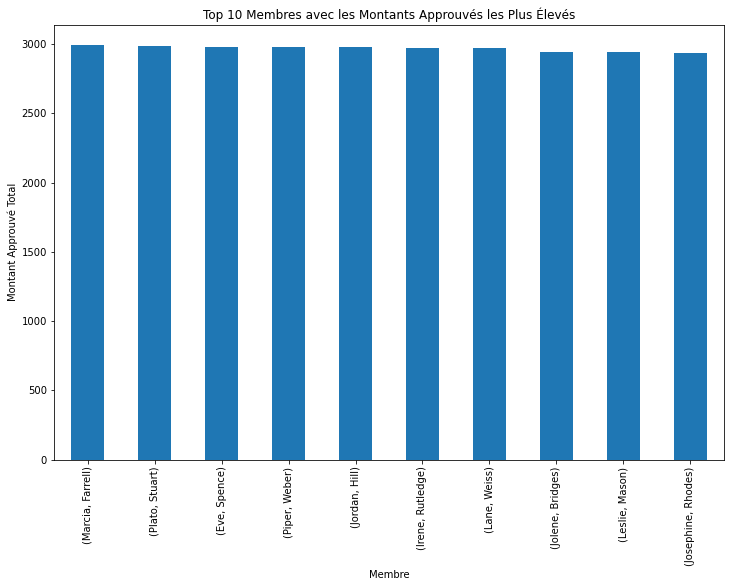

In [30]:
plt.figure(figsize=(12, 8))
top_members = df1.groupby(['member_first_name', 'member_last_name'])['approuved_amount'].sum().nlargest(10)
top_members.plot(kind='bar')
plt.title('Top 10 Membres avec les Montants Approuvés les Plus Élevés')
plt.xlabel('Membre')
plt.ylabel('Montant Approuvé Total')
plt.xticks(rotation=90)
plt.show()


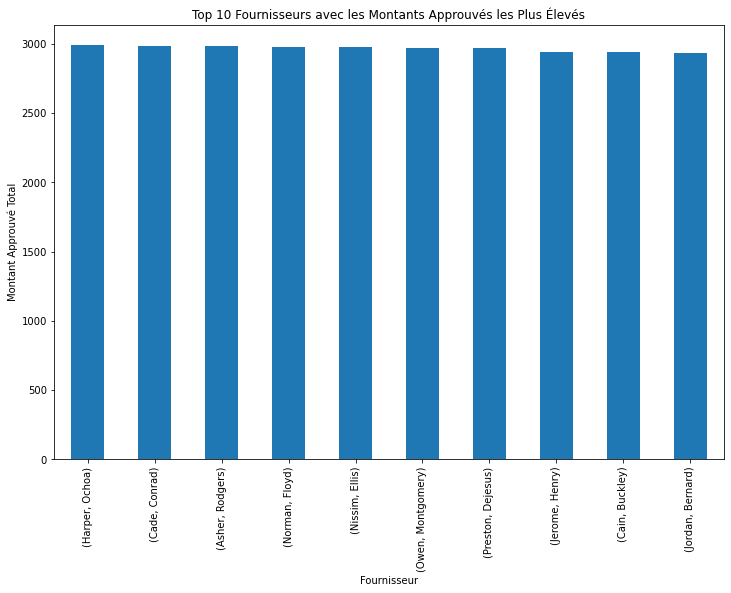

In [31]:
plt.figure(figsize=(12, 8))
top_providers = df1.groupby(['provider_first_name', 'provider_last_name'])['approuved_amount'].sum().nlargest(10)
top_providers.plot(kind='bar')
plt.title('Top 10 Fournisseurs avec les Montants Approuvés les Plus Élevés')
plt.xlabel('Fournisseur')
plt.ylabel('Montant Approuvé Total')
plt.xticks(rotation=90)
plt.show()


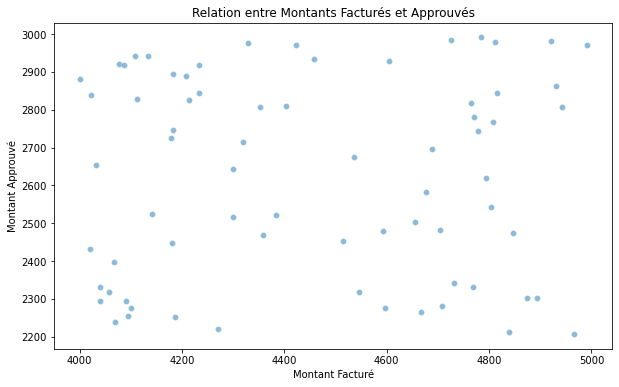

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='billed_amount', y='approuved_amount', alpha=0.5)
plt.title('Relation entre Montants Facturés et Approuvés')
plt.xlabel('Montant Facturé')
plt.ylabel('Montant Approuvé')
plt.show()